<ipython-input-4-a3950b7a07c9>:11: RuntimeWarning: overflow encountered in exp
  return k1L+k2L*np.exp(-(x-24)/tau)


[1.79394670e-03 2.93299433e-03 1.31385454e+02]
k1,k2,c: 4.485 7.332 963.382


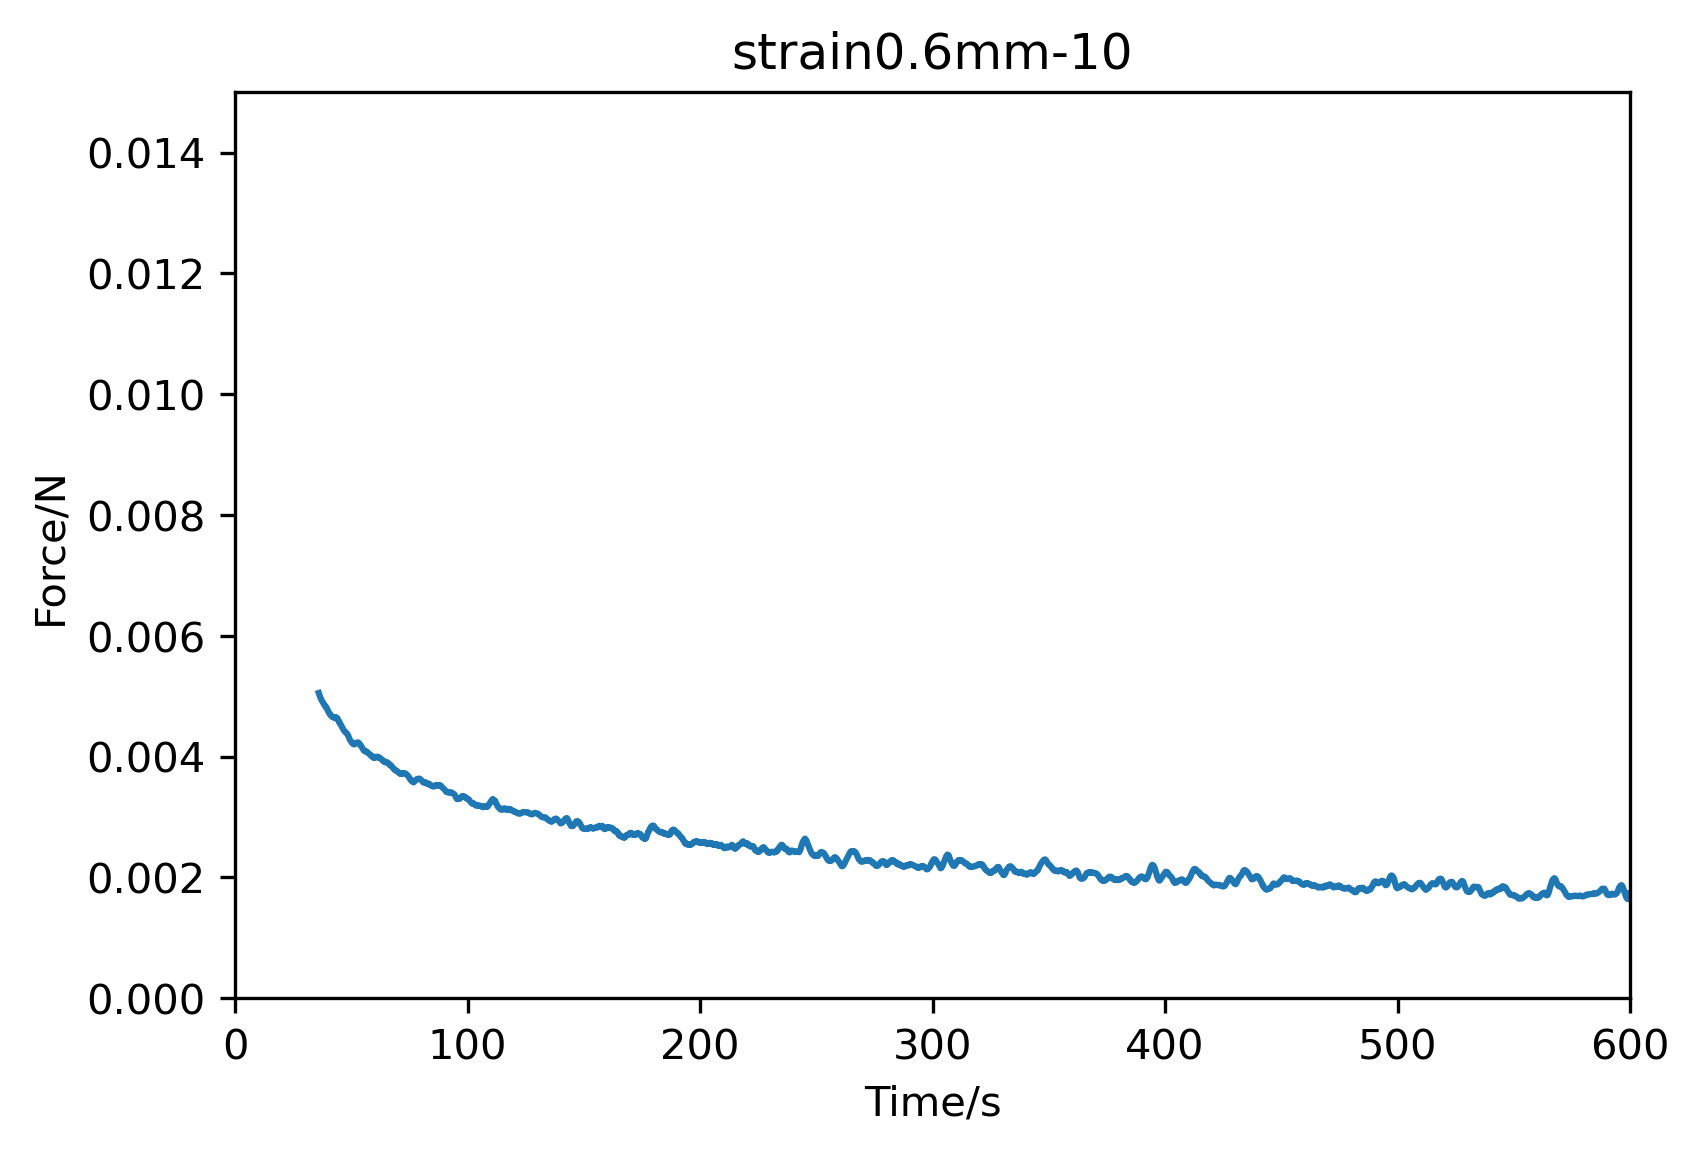

In [4]:
#Stress relaxation Fitting via SLS model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'D:\Research files\Nose kohsaka lab\Soft robotics\Design\Matlab\Neuromechanical model\MyModel\NM\Data\Larvae measurement\20200303\SR0.4mm-18.csv')
x = np.array(data['sec']); y = np.array(data['N']);

#Data filtering via the signal smoothing method--Savitzky-Golay filter
# Signal fitting
def SRF(x,k1L,k2L,tau):
    return k1L+k2L*np.exp(-(x-24)/tau)

# fitting for parameters
import scipy
from scipy import signal
x_SR = x[720:12000]
y_SR = signal.savgol_filter(y[720:12000],101,3)
params,cov = scipy.optimize.curve_fit(SRF,x_SR,y_SR,p0=[10,10,10])
print(params)
print('k1,k2,c:',round(params[0]*2500,3),round(params[1]*2500,3),round(params[1]*params[2]*2500,3))
# plot the fitting results
plt.figure()
plt.plot(x_SR,y_SR)
plt.xlabel('Time/s')
plt.ylabel('Force/N')
plt.xlim(0,600)
plt.ylim(0, 0.015)
# plt.box(on)
figure_name = 'strain0.6mm-10'
plt.title(figure_name)
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300
plt.savefig(figure_name+'.png',dpi = 300)
# %matplotlib inline
plt.show()

[2.99677233e-03 1.97583464e-03 3.14771685e+01]
k1,k2,c: 4.995 3.293 103.656


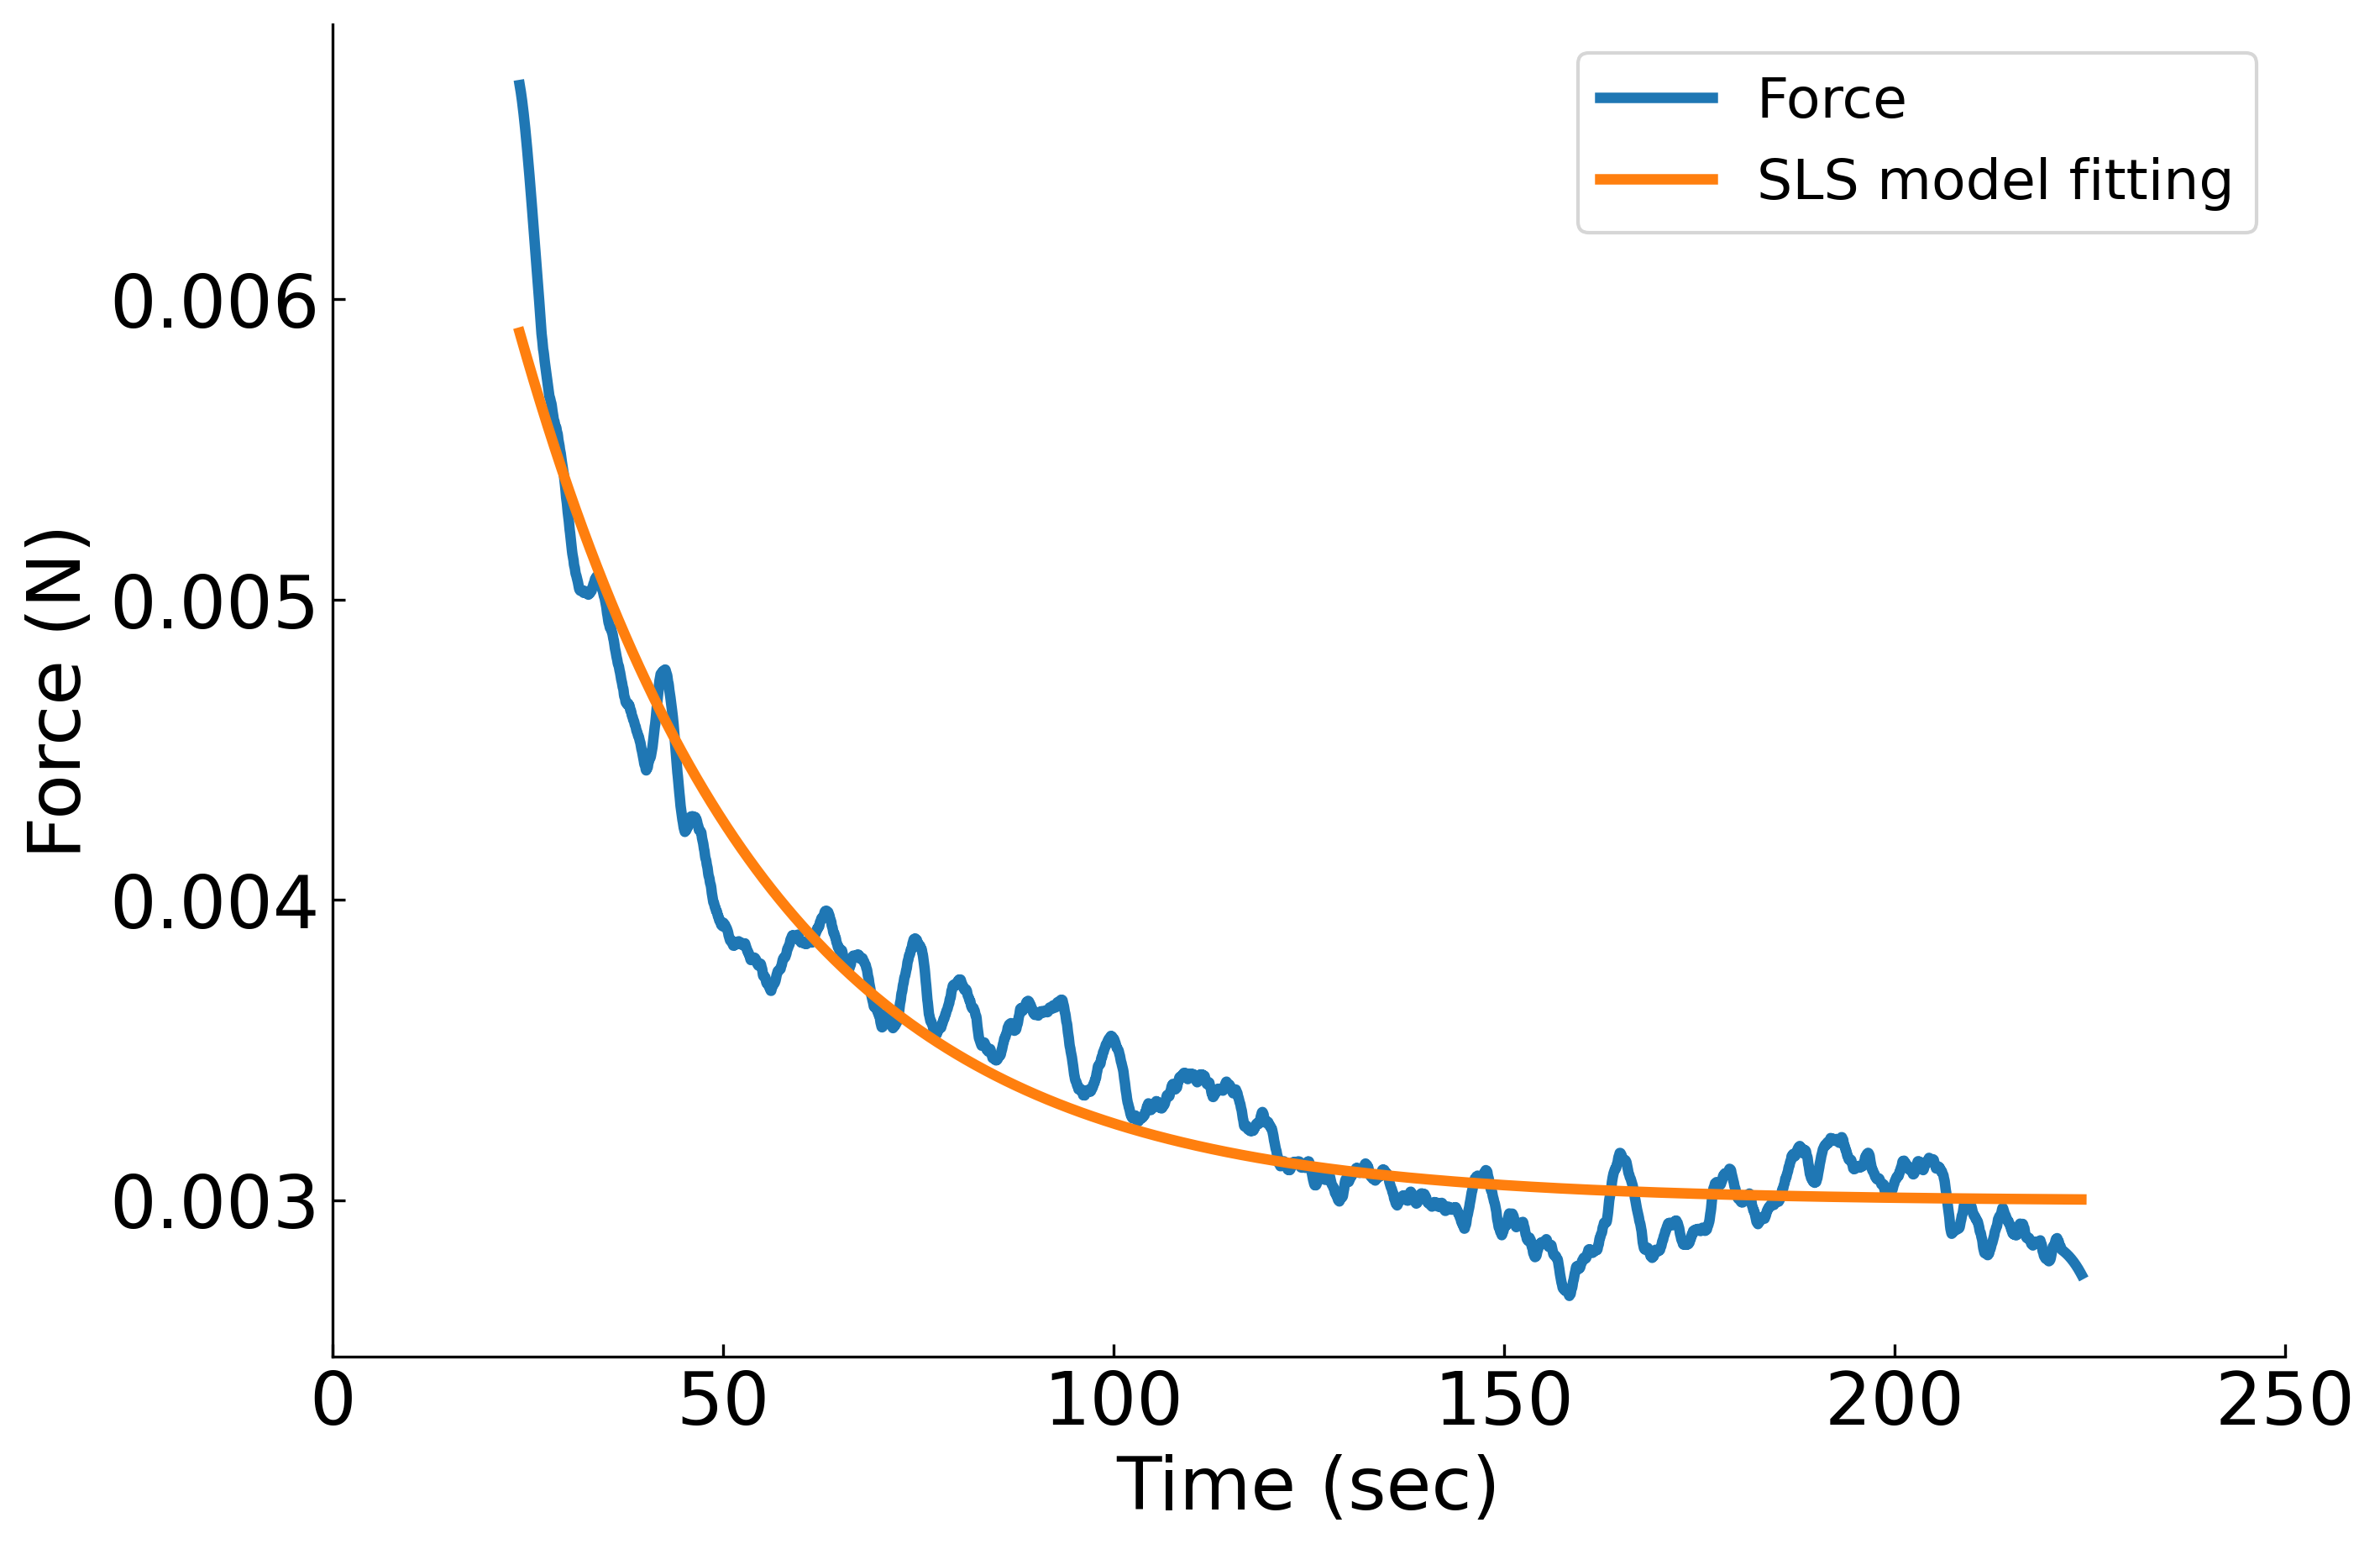

In [17]:
#Stress relaxation Fitting via SLS model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

data = pd.read_csv(r'D:\Research files\Nose kohsaka lab\Soft robotics\Design\Python\Physical experiments\StressRelaxation\20201215\strain0.4mm-1.csv')
x = np.array(data['sec']); y = np.array(data['N']);

#Data filtering via the signal smoothing method--Savitzky-Golay filter
# Signal fitting
def SRF(x,k1L,k2L,tau):
    return k1L+k2L*np.exp(-(x-36)/tau)

# fitting for parameters
import scipy
from scipy import signal
x_SR = x[480:4480]
y_SR = signal.savgol_filter(y[480:4480],101,3)
params,cov = scipy.optimize.curve_fit(SRF,x_SR,y_SR,p0=[10,10,10])
print(params)
# adjust strain parameter
print('k1,k2,c:',round(params[0]*5000/3,3),round(params[1]*5000/3,3),round(params[1]*params[2]*5000/3,3))
# plot the fitting results
plt.figure(figsize = (10,7))
plt.plot(x_SR,y_SR,label='Force', linewidth = 3)
plt.plot(x_SR,SRF(x_SR,params[0],params[1],params[2]),label='SLS model fitting', linewidth = 3)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.legend(loc='best', fontsize = 16)
plt.xlabel('Time (sec)')
plt.ylabel('Force (N)')
plt.rcParams.update({'font.size': 21})

plt.xlim(0,250)
y_major_locator=MultipleLocator(0.001)
ax.yaxis.set_major_locator(y_major_locator)

figure_name = 'Stress relaxation curve'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300
plt.savefig(figure_name+'201215'+'0.4mm-200s-1'+'.png',dpi = 600)
# %matplotlib inline
plt.show()

[  11.53152644 3757.96307382]
k,c 11.532 3757.963


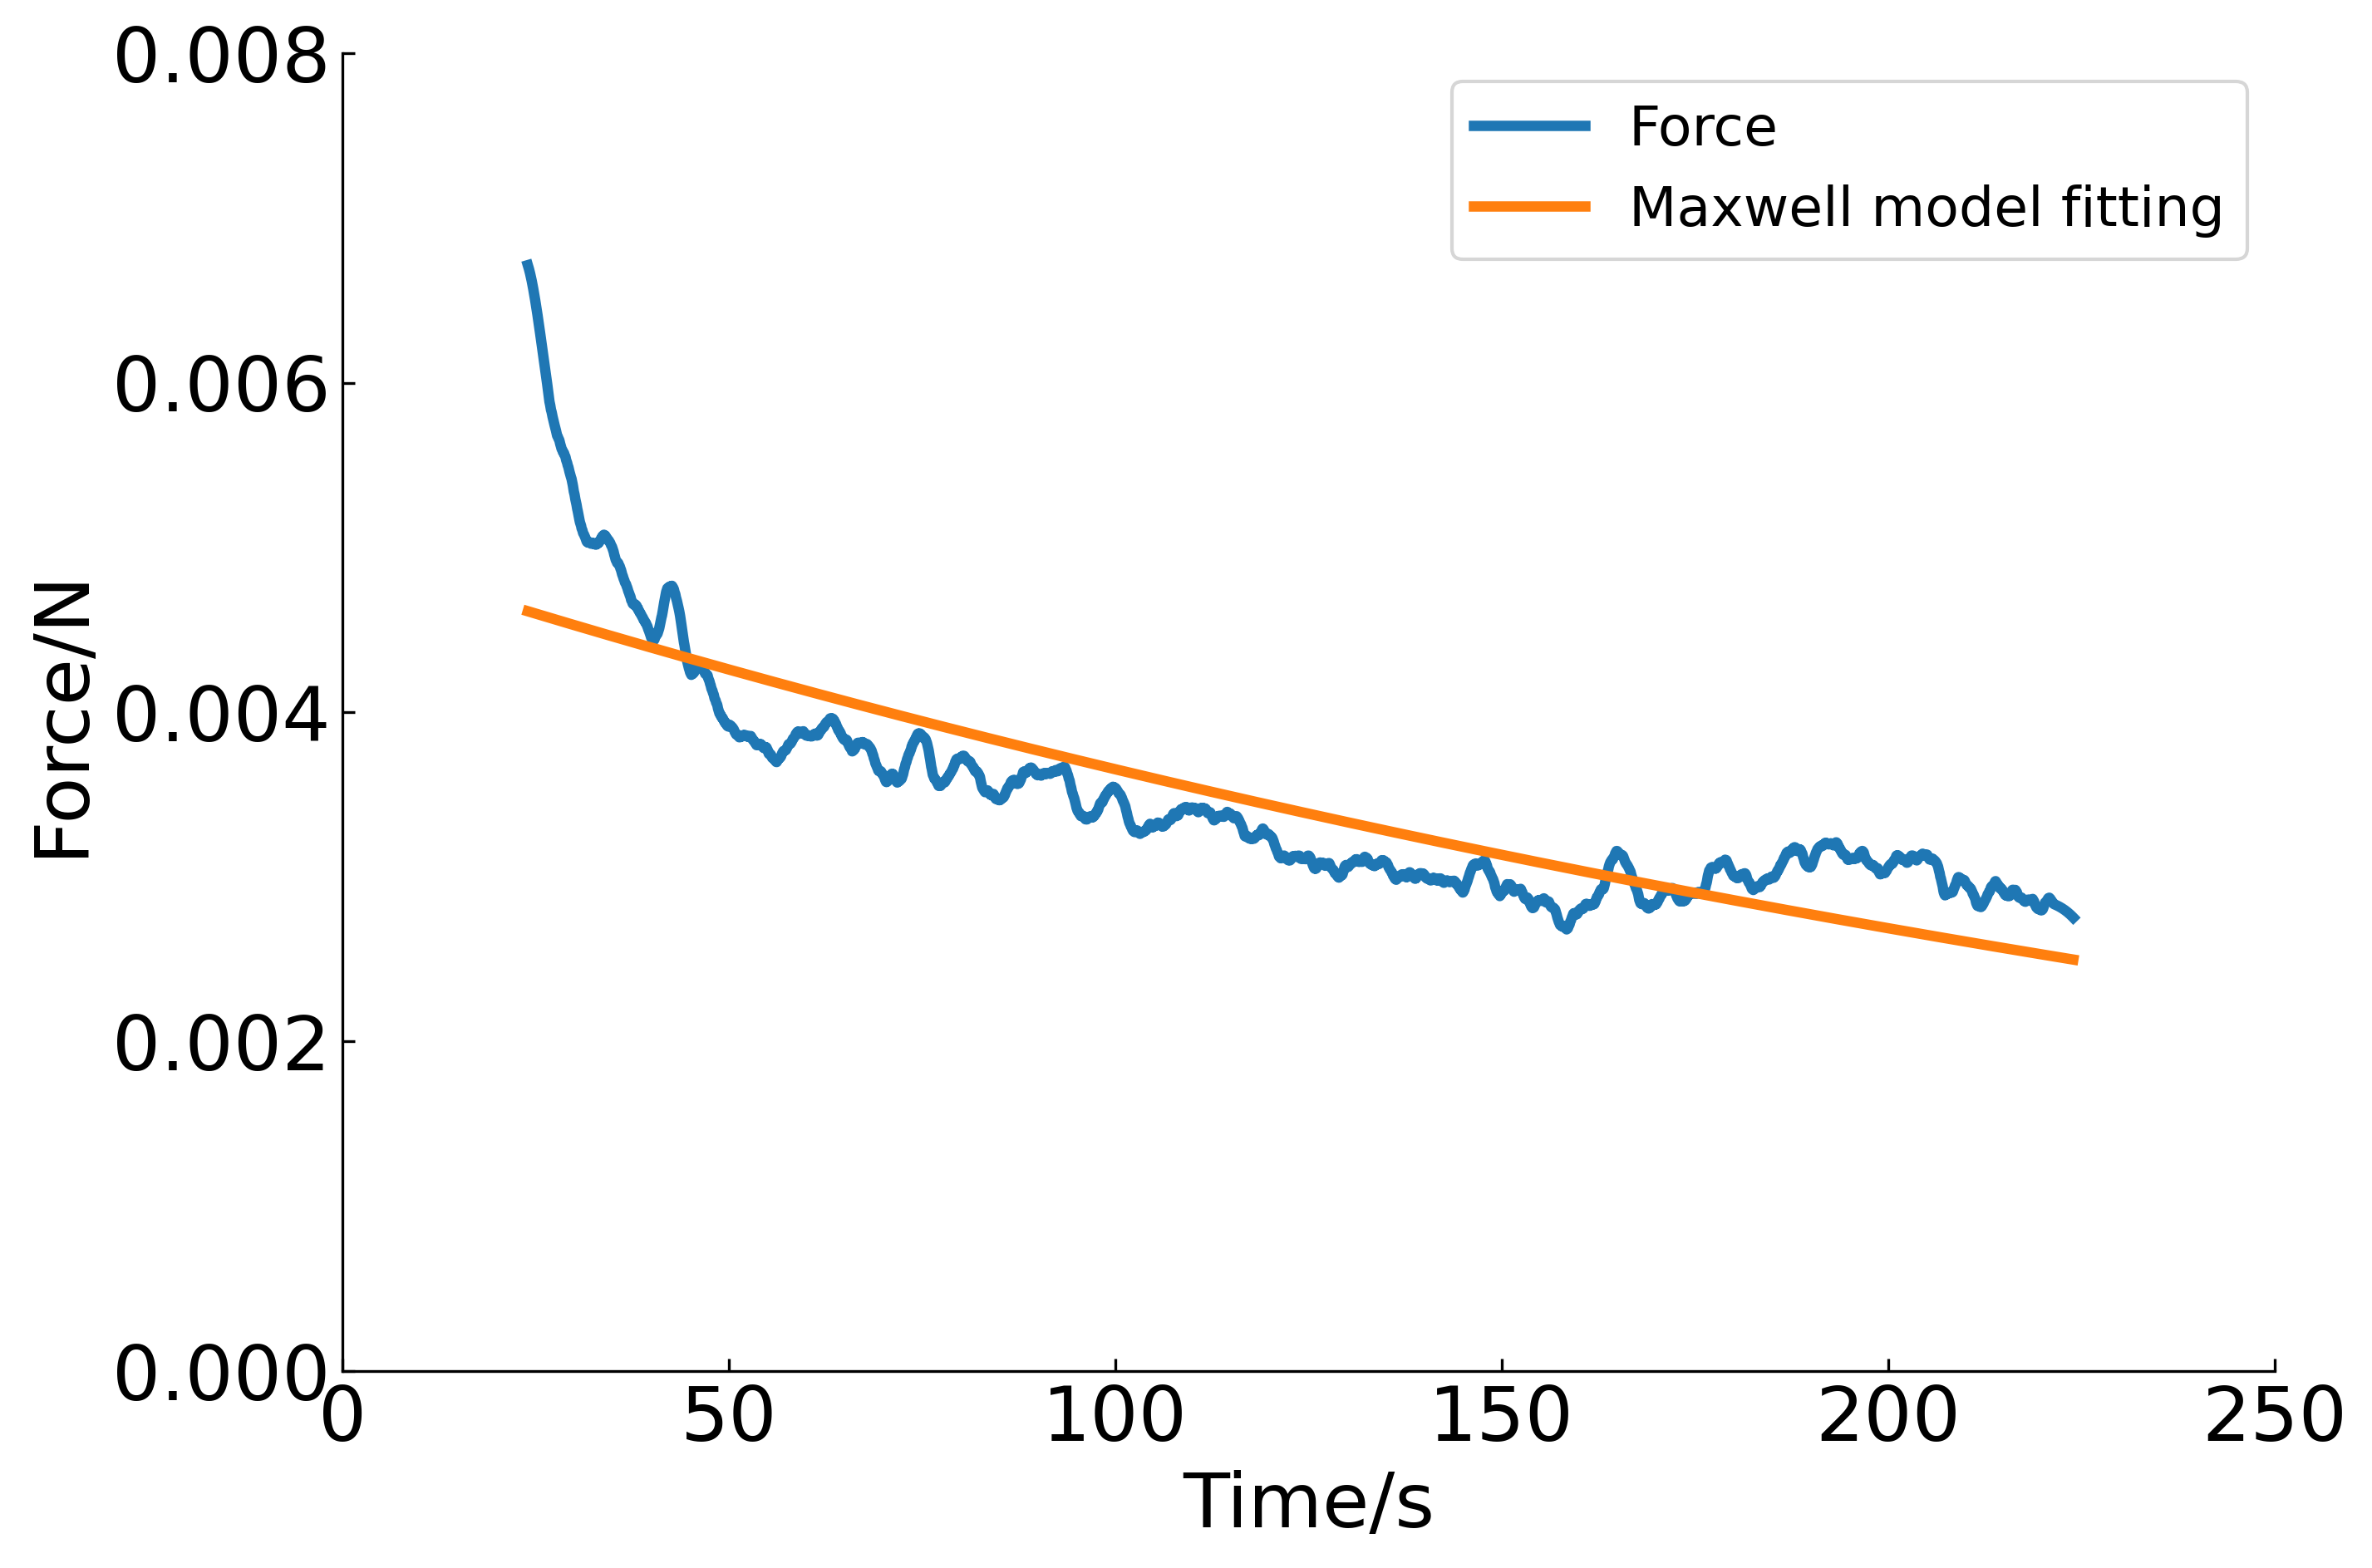

In [14]:
#Stress relaxation Fitting via maxwell model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

data = pd.read_csv(r'D:\Research files\Nose kohsaka lab\Soft robotics\Design\Python\Physical experiments\StressRelaxation\20201215\strain0.4mm-1.csv')
x = np.array(data['sec']); y = np.array(data['N']);

#Data filtering via the signal smoothing method--Savitzky-Golay filter
# Signal fitting
def SRF(x,k,c):
    return k*np.exp(-(k/c)*(x-24))*0.0004

# fitting for parameters
import scipy
from scipy import signal
x_SR = x[480:4480]
y_SR = signal.savgol_filter(y[480:4480],101,3)
params,cov = scipy.optimize.curve_fit(SRF,x_SR,y_SR,p0=[10,10])
print(params)
print('k,c',round(params[0],3),round(params[1],3))
# plot the fitting results
plt.figure(figsize = (10,7))
plt.plot(x_SR,y_SR,label='Force', linewidth = 3)
plt.plot(x_SR,SRF(x_SR,params[0],params[1]),label='Maxwell model fitting', linewidth = 3)
plt.legend(loc='best', fontsize = 16)
plt.xlabel('Time/s')
plt.ylabel('Force/N')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,250)
plt.ylim(0, 0.008)
y_major_locator=MultipleLocator(0.002)
ax.yaxis.set_major_locator(y_major_locator)
plt.rcParams.update({'font.size': 22})

# plt.box(on)
figure_name = 'Stress relaxation curve'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300
plt.savefig(figure_name+'Maxwell'+'.png',dpi = 300)
# %matplotlib inline
plt.show()

[8.6270218  8.15794442]
k,c 8.627 8.158


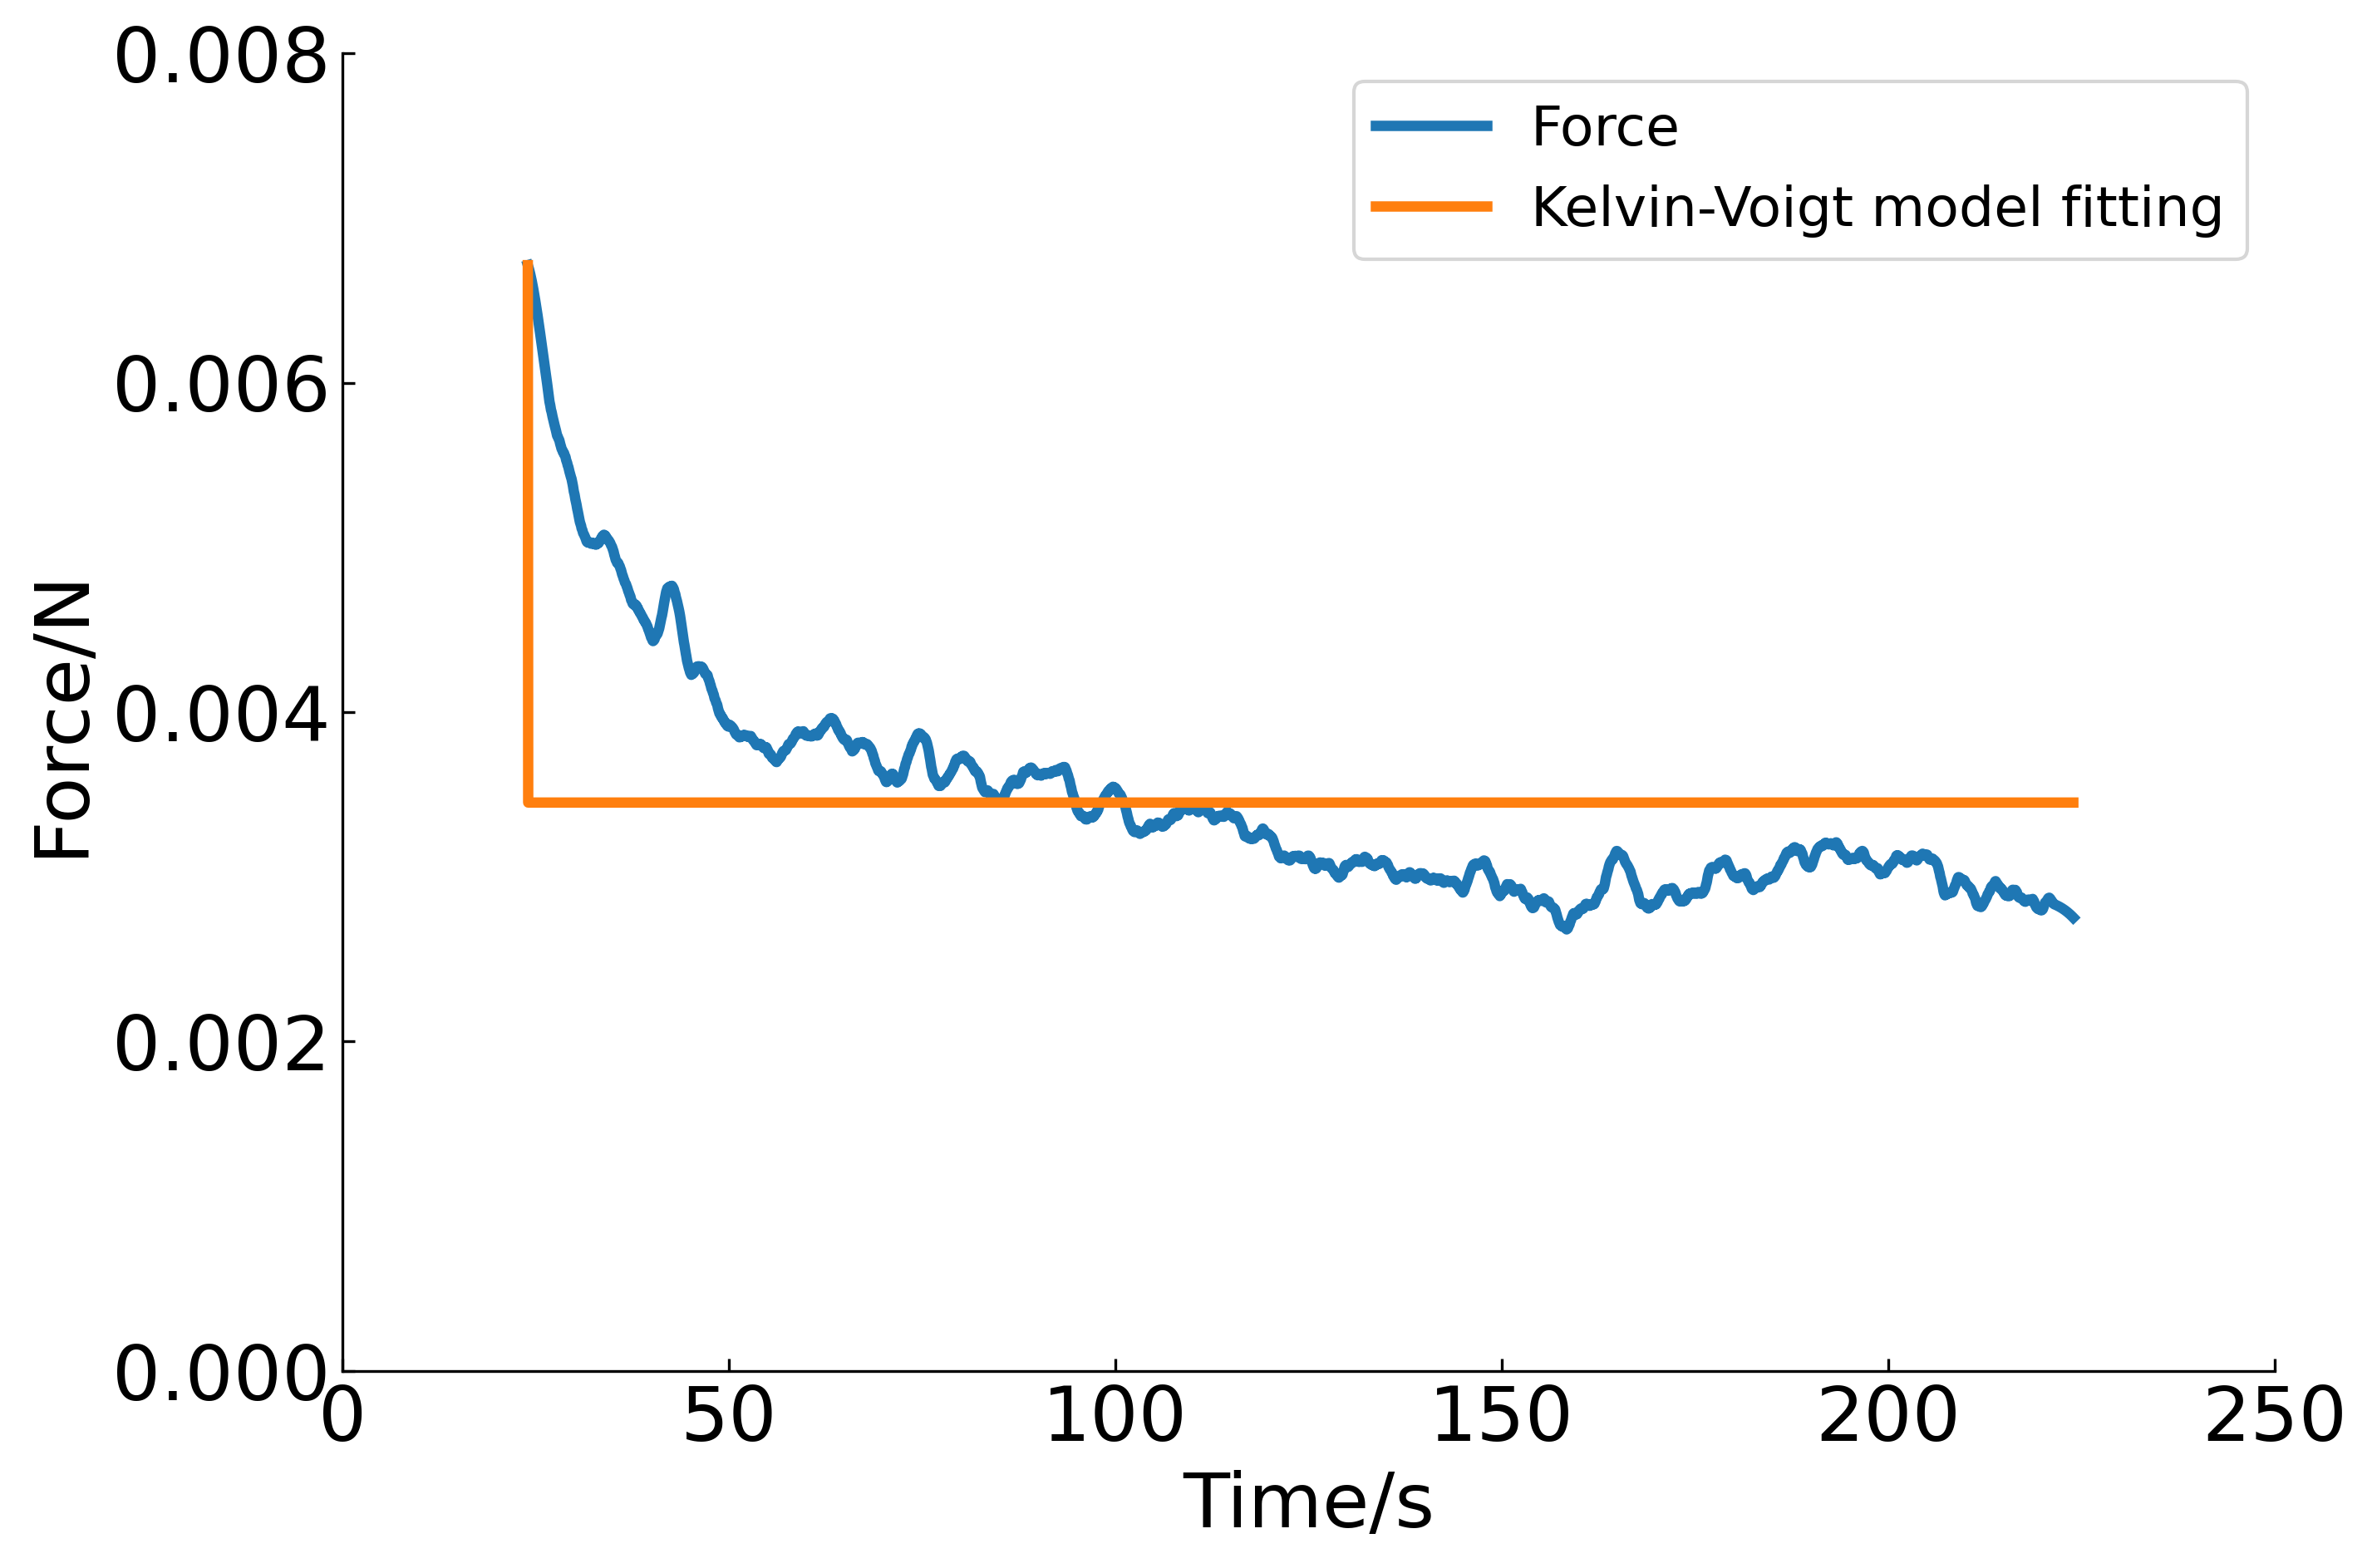

In [15]:
#Stress relaxation Fitting via maxwell model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

data = pd.read_csv(r'D:\Research files\Nose kohsaka lab\Soft robotics\Design\Python\Physical experiments\StressRelaxation\20201215\strain0.4mm-1.csv')
x = np.array(data['sec']); y = np.array(data['N']);

#Data filtering via the signal smoothing method--Savitzky-Golay filter
# Signal fitting
def SRF(x,k,c):
        return k*0.0004*x/x+c*0.0004*(x==24)


# fitting for parameters
import scipy
from scipy import signal
x_SR = x[480:4480]
y_SR = signal.savgol_filter(y[480:4480],101,3)
params,cov = scipy.optimize.curve_fit(SRF,x_SR,y_SR,p0=[10,10])
print(params)
print('k,c',round(params[0],3),round(params[1],3))
# plot the fitting results
plt.figure(figsize = (10,7))
plt.plot(x_SR,y_SR,label='Force', linewidth = 3)
plt.plot(x_SR,SRF(x_SR,params[0],params[1]),label='Kelvin-Voigt model fitting', linewidth = 3)
plt.legend(loc='best',fontsize = 16)
plt.xlabel('Time/s')
plt.ylabel('Force/N')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,250)
plt.ylim(0, 0.008)
y_major_locator=MultipleLocator(0.002)
ax.yaxis.set_major_locator(y_major_locator)
plt.rcParams.update({'font.size': 22})
# plt.box(on)
figure_name = 'Stress relaxation curve'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300
plt.savefig(figure_name+'KV'+'.png',dpi = 300)
# %matplotlib inline
plt.show()